<a href="https://colab.research.google.com/github/mathewchamberlain/MBA/blob/main/Group_Project_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pprint import pprint

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        1.1G        9.0G        1.2M        2.6G         11G
Swap:            0B          0B          0B


In [2]:
!ls

sample_data


# Step 1: Data Loading


In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:

!ls -lrth /content/drive/MyDrive/MK842/adult.csv

ls: cannot access '/content/drive/MyDrive/MK842/adult.csv': No such file or directory


In [30]:
df = pd.read_csv('/content/drive/MyDrive/MK842/adult.csv')

In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Step 2: Data Exploration

In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
 15  high_income     32561 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [ ]:
# Count missing values by column
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
high_income       0
dtype: int64

In [ ]:
len(df.columns)

15

In [ ]:
pprint(list(df.columns))

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']


In [ ]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
df['income'].value_counts().sum() == df.shape[0]

True

In [ ]:
df['high_income'] = df['income'].apply(lambda income: 1 if income == '>50K' else 0)

In [ ]:
df.high_income.value_counts()

0    24720
1     7841
Name: high_income, dtype: int64

In [ ]:
df.shape

(32561, 16)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'high_income'],
      dtype='object')

In [ ]:
pd.Series.mean?

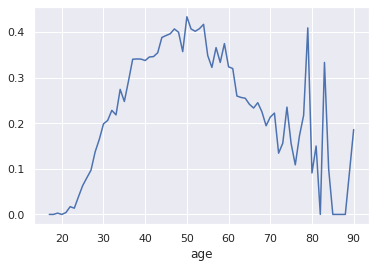

In [ ]:
# Distribution of mean over age
df.groupby(['age'])['high_income'].mean().plot()

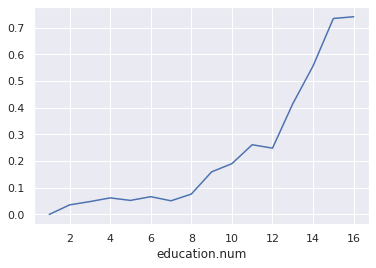

In [ ]:
# Number of years of education versus mean probablility of high income
df.groupby(['education.num'])['high_income'].mean().plot()

In [ ]:
df.groupby(['occupation'])['high_income'].mean().sort_values(ascending=False)

occupation
Exec-managerial      0.484014
Prof-specialty       0.449034
Protective-serv      0.325116
Tech-support         0.304957
Sales                0.269315
Craft-repair         0.226641
Transport-moving     0.200376
Adm-clerical         0.134483
Machine-op-inspct    0.124875
Farming-fishing      0.115694
Armed-Forces         0.111111
?                    0.103635
Handlers-cleaners    0.062774
Other-service        0.041578
Priv-house-serv      0.006711
Name: high_income, dtype: float64

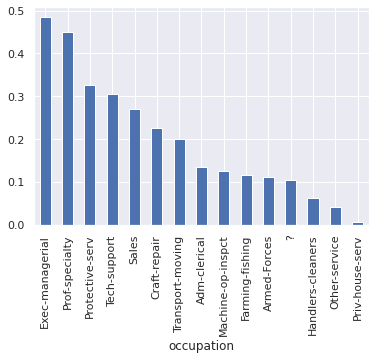

In [ ]:
# High earning probabilities by occupation
df.groupby(['occupation'])['high_income'].mean().sort_values(ascending=False)\
  .plot(kind='bar')

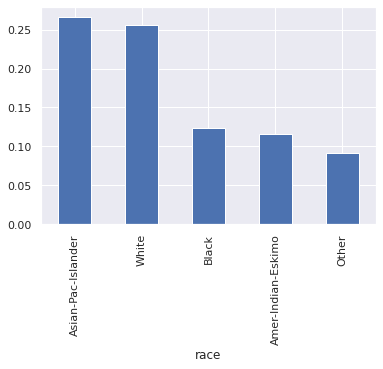

In [ ]:
# High-earning probabilities by race
df.groupby(['race'])['high_income'].mean().sort_values(ascending=False)\
  .plot(kind='bar')

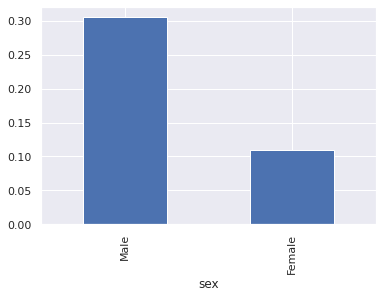

In [ ]:
# High-earning probabilities by sex
df.groupby(['sex'])['high_income'].mean().sort_values(ascending=False)\
  .plot(kind='bar')

In [ ]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

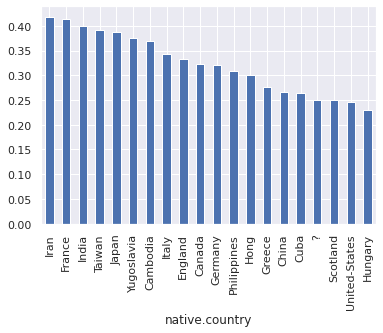

In [ ]:
# High-earning probabilities by country - Looks weird - Check US vs Iran
n = 20
df.groupby(['native.country'])['high_income'].mean().sort_values(ascending=False)[:n]\
  .plot(kind='bar')

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'high_income'],
      dtype='object')

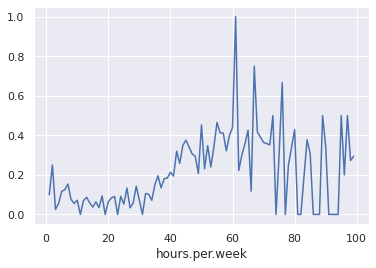

In [ ]:
# Working hours per week versus mean probablility of high income
df.groupby(['hours.per.week'])['high_income'].mean().plot()

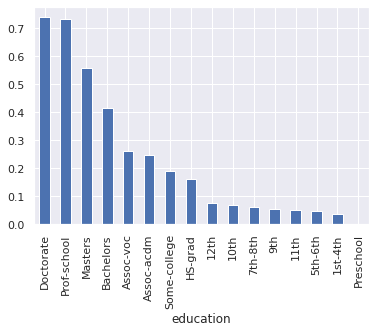

In [ ]:
# High-earning probabilities by education
df.groupby(['education'])['high_income'].mean().sort_values(ascending=False)\
  .plot(kind='bar')

In [46]:
# run a classifier predicting income
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# one hot encode the categorical variables
q = pd.get_dummies(df)

# split test and train
y = q['income_>50K']
q = q.drop('income_>50K', axis = 1)
q = q.drop('income_<=50K', axis = 1)
Xtrain, Xtest, ytrain, ytest = train_test_split(q, y,random_state=1)
model = RandomForestClassifier()                       # 2. instantiate model
model.fit(Xtrain, ytrain, sample_weight = Xtrain['fnlwgt'])                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data
accuracy_score(ytest, y_model)

0.859231052696229

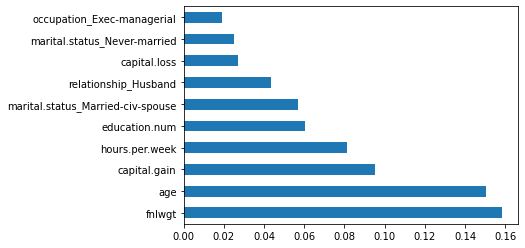

In [47]:
feat_importances = pd.Series(model.feature_importances_, index=q.columns)
feat_importances.nlargest(10).plot(kind='barh')